**Carlos Daniel Fernández Múnera**  
Taller para: Universidad de Antioquia  
Facultad de Ciencias Económicas  
Medellín, Colombia

**Contador Público**  
Universidad de Antioquia   
**Especialista en Analítica - Pendiente de grado**  
Universidad Nacional de Colombia    
**Aspirante a Magíster en Ingeniría Analítica**  
Universidad Nacional de Colombia

---


### Referencias


https://www.r-bloggers.com/data-visualization-in-r-using-ggplot2/

https://rua.ua.es/dspace/bitstream/10045/69767/1/Modulo_4_-_Graficos_avanzados_con_ggplot2.pdf

## Visualización de datos en lenguaje R usando ggplot2

### ¿Qué es ggplot 2?

Es una herramienta de graficación muy versátil y robusta. Contiene una sintáxis sencilla que consiste básicamente en dividir la el código en 3 partes:


>* Plot = data + aesthetics + geometry

data: conjunto de información que se va utilizar en el proceso

aesthetics: indica las variables del conjunto que se van a llevar al contenedor (más adelante vemos el contenedor)

geometry: hace referencia al tipo de gráfico y sus respectivos accesorios (barras, cajas, histograma, densidad, puntos etc.)

**Otros tips importantes son:**

faceting: pasar el mismo conjunto de datos por dos gráficos diferentes, agrupando por alguna variable; por ejemplo, agrupamiento por edad  
Anotaciones: texto en las gráficas      
Escalas: definir limites en los ejes  



 **Algunos de los plots más usados son:**   
 
**Scatter Plot**: geom_point(), geom_smooth(), stat_smooth()

**Bar Chart**: geom_bar(), geom_errorbar()

**Histogram**: geom_histogram(), stat_bin(), position_identity(), position_stack(), position_dodge()

**Box Plot**: geom_boxplot(), stat_boxplot(), stat_summary()

**Line Plot**: geom_line(), geom_step(), geom_path(), geom_errorbar()

**Pie Chart**:coord_polar()


### Gran objetivo de la visualización: gráficos simples con gran información

Con fines pedagógicos, R ofrece algunos conjuntos de datos precargados con los que normalmente se plantean los ejemplos de la documentación.

Estos conjuntos de datos son:  
**Iris**  
mpg  Miles/(US) gallon  
cyl  Number of cylinders  
disp  Displacement (cu.in.)  
hp  Gross horsepower  
drat  Rear axle ratio  
wt  Weight (1000 lbs)  
qsec 1/4 mile time  
vs  V/S  
am  Transmission (0 = automatic, 1 = manual)  
gear  Number of forward gears  
carb  Number of carburetors  

### Dataset iris

Es un clásico de la literatura para probar métodos estadísticos y de clasificación. Asi como para realizar pruebas de concepto.

Contiene información de la flor **Iris** en sus respectivas especies: sectosa, versicolor y virginica.

Los datos contienen una serie de medidas que son el largo y el ancho del sépalo y el largo y el ancho del pétalo, y una variable que contiene a que especie pertenece según esas características

![](iris.jpeg)

In [39]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


**En un principio se mencionó la sinttáxis general de la librería, apliquémoslo**


>* Plot = data + aesthetics + geometry

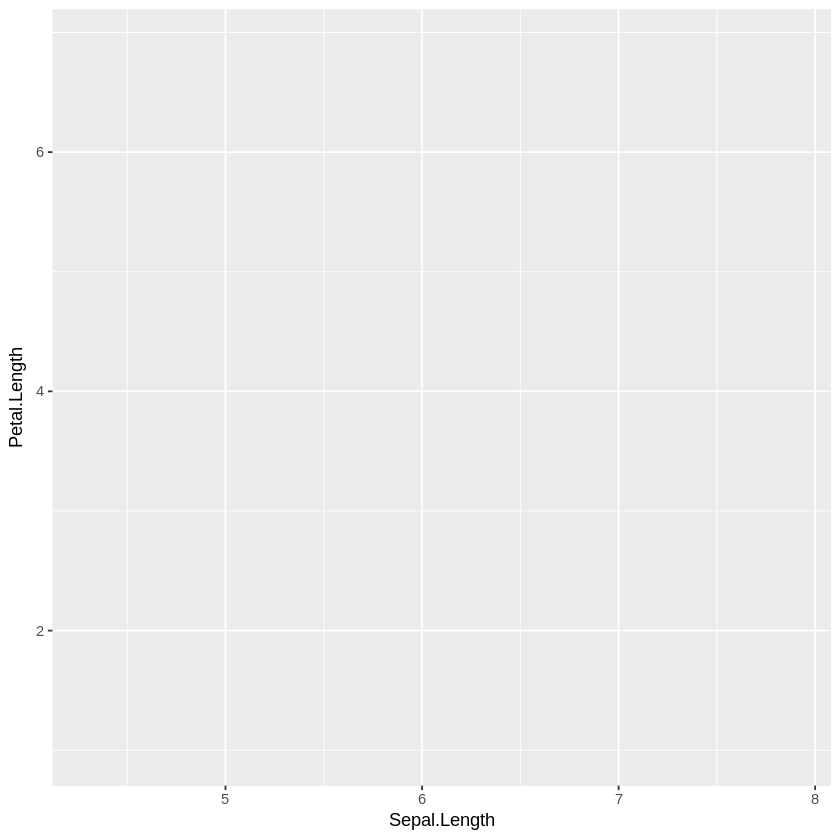

In [12]:
## Creamos el contenedor, es decir los datos que le vamos a enviar
## a la gráfica. Como se puede ver no arroja nada puesto que no
## hemos dado la instrucción de lo que queremos ver

ggplot(data=iris, aes(Sepal.Length, Petal.Length)) 

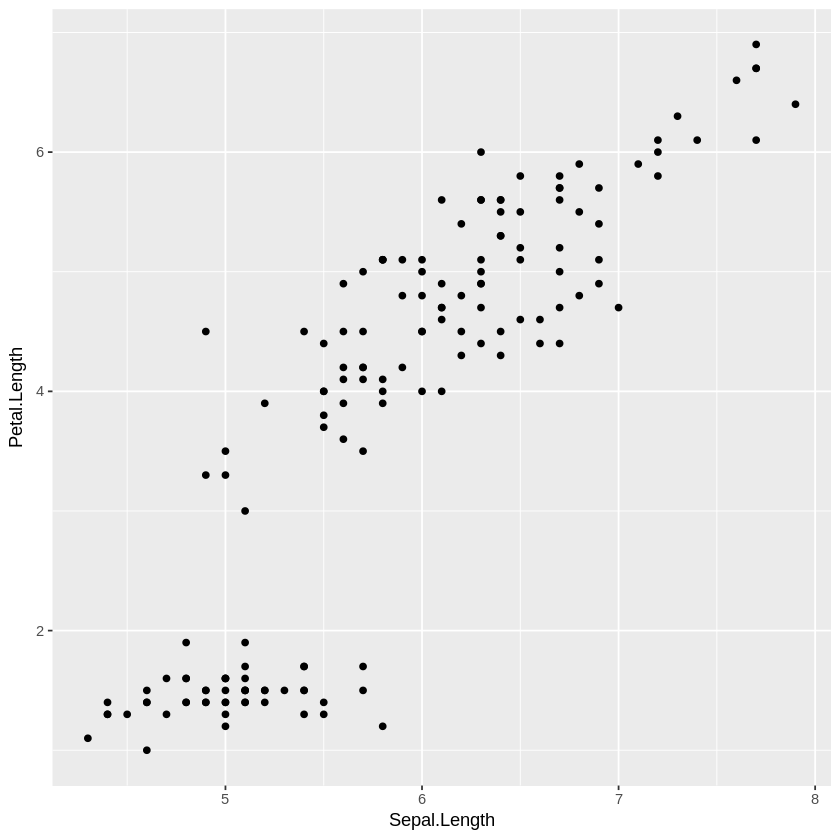

In [45]:
##Observe que en esta línea de código  adicionamos el tipo de gráfico
##que se quiere visualizar

ggplot(data=iris, aes(Sepal.Length, Petal.Length))  + geom_point()

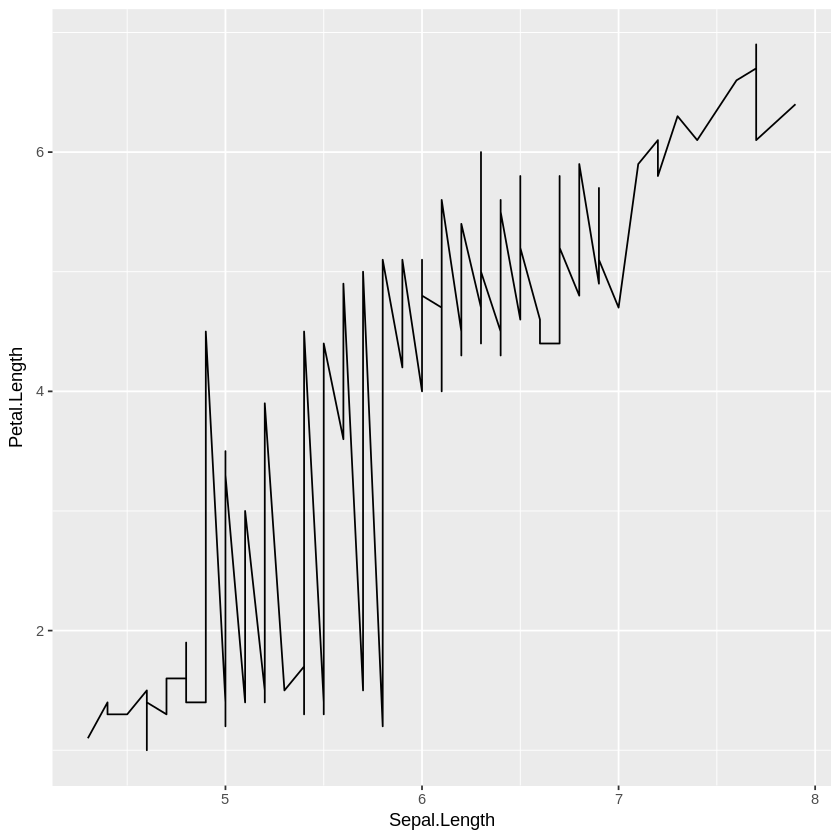

In [81]:
##Observe que nos basamos en el código anterior pero simplemente cambiamos
## el tipo de gráfico que deseamos visualizar

ggplot(data=iris, aes(Sepal.Length, Petal.Length)) + geom_line()

`geom_smooth()` using method = 'loess'


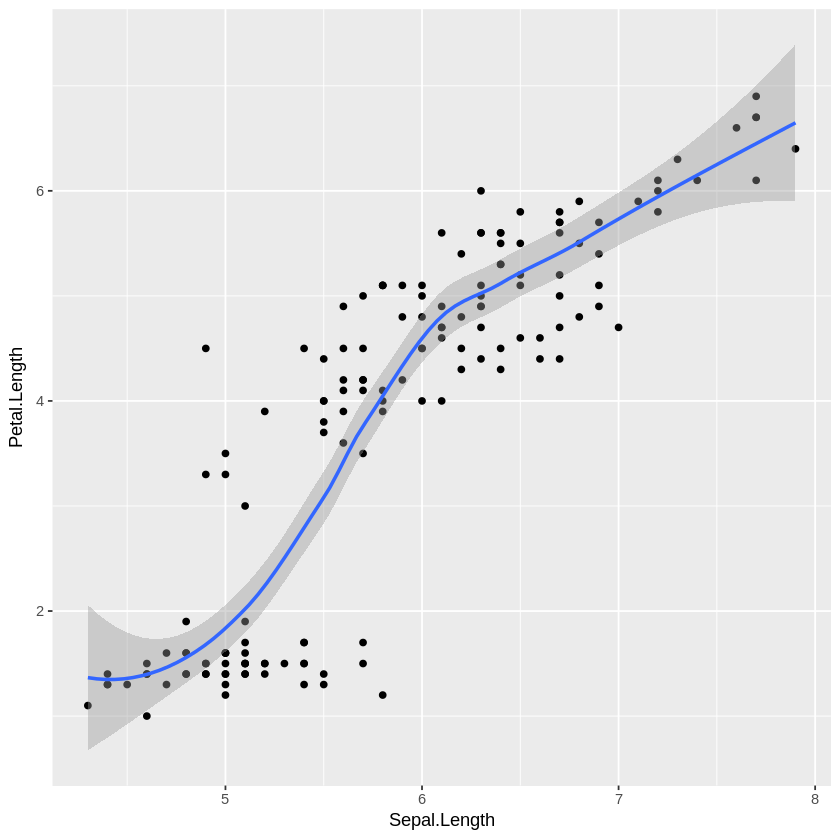

In [42]:
ggplot(data=iris, aes(Sepal.Length, Petal.Length)) + 
geom_point() + stat_smooth()

**¿Qué es un stat_smooth?**
Suavización exponencial


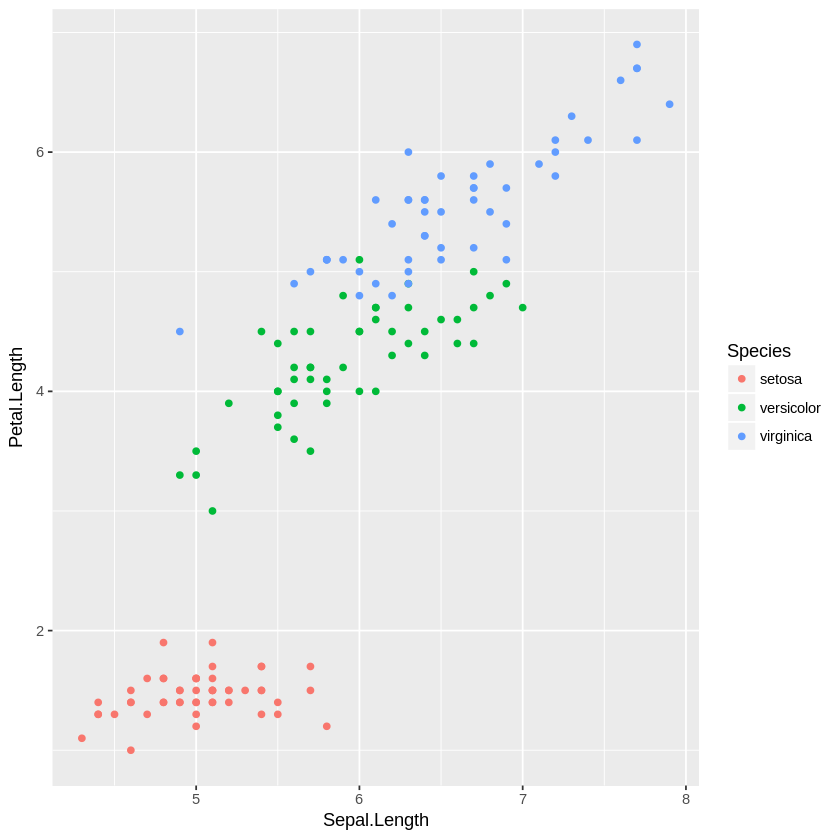

In [44]:
### Agrupar por colores según la especie

ggplot(data=iris, aes(Sepal.Length, Petal.Length,color=Species)) +
geom_point()

`geom_smooth()` using method = 'loess'


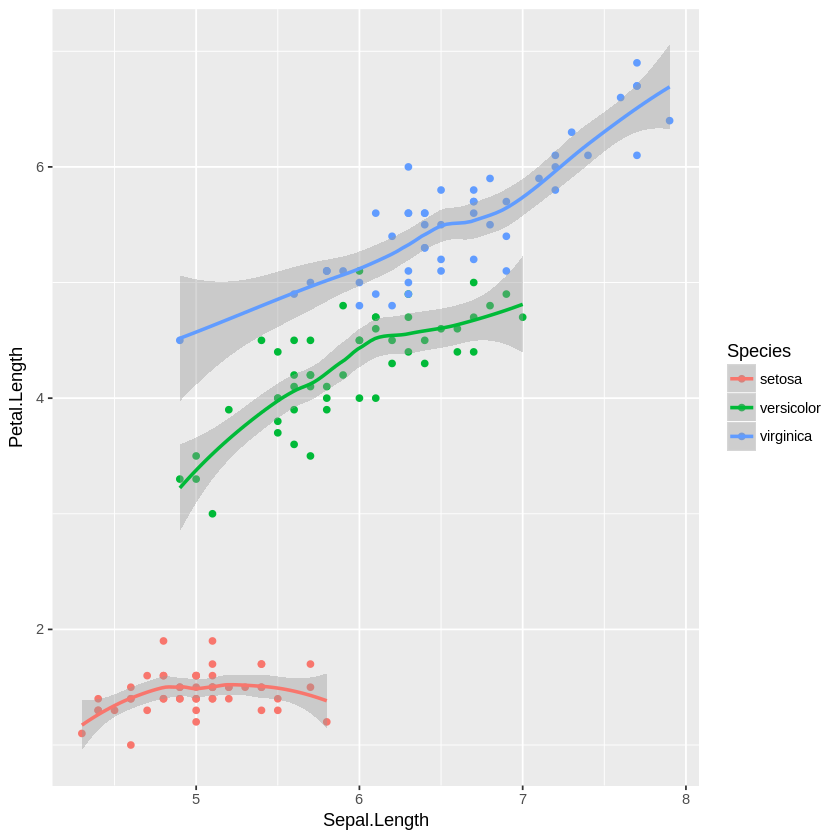

In [34]:
### Ahora le agregaremos la líneas de suavizado, con sus bandas de 
#confianza, también por especies:

# Creamos el contenedor de ggplot
ggplot(data=iris, aes(Sepal.Length, Petal.Length,color=Species)) +
geom_point() + # los puntos
stat_smooth() # líneas y bandas de suavizado (smooth)

`geom_smooth()` using method = 'loess'


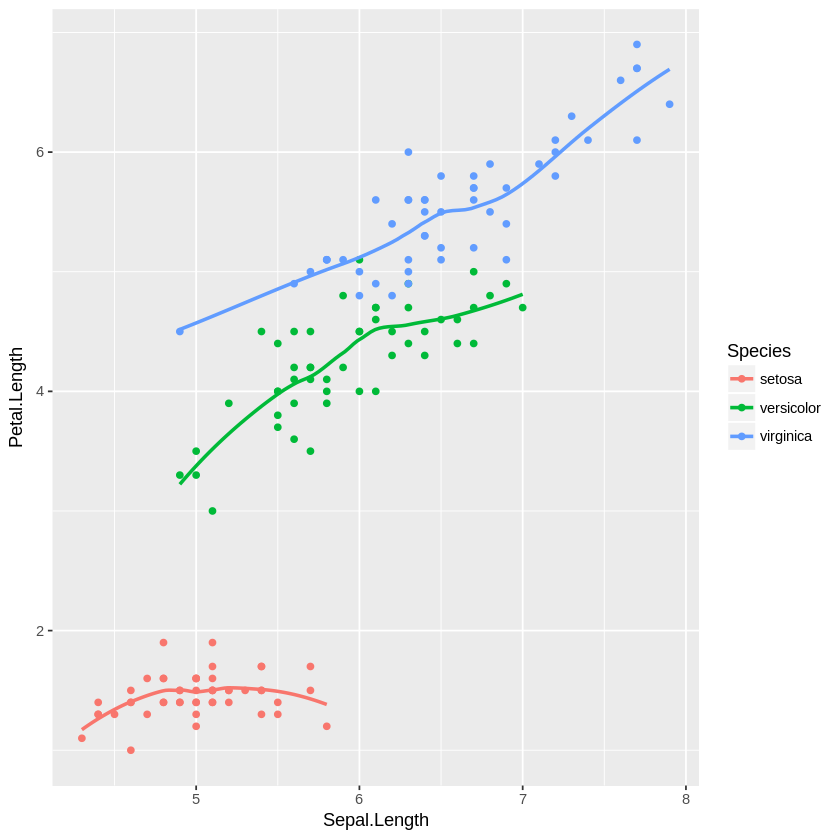

In [21]:
# Ahora sin banda de confianza
# Creamos el contenedor de ggplot
ggplot(data=iris, aes(Sepal.Length, Petal.Length,color=Species)) +
geom_point() + # los puntos
stat_smooth(se=FALSE) # líneas y bandas de suavizado (smooth)

`geom_smooth()` using method = 'loess'


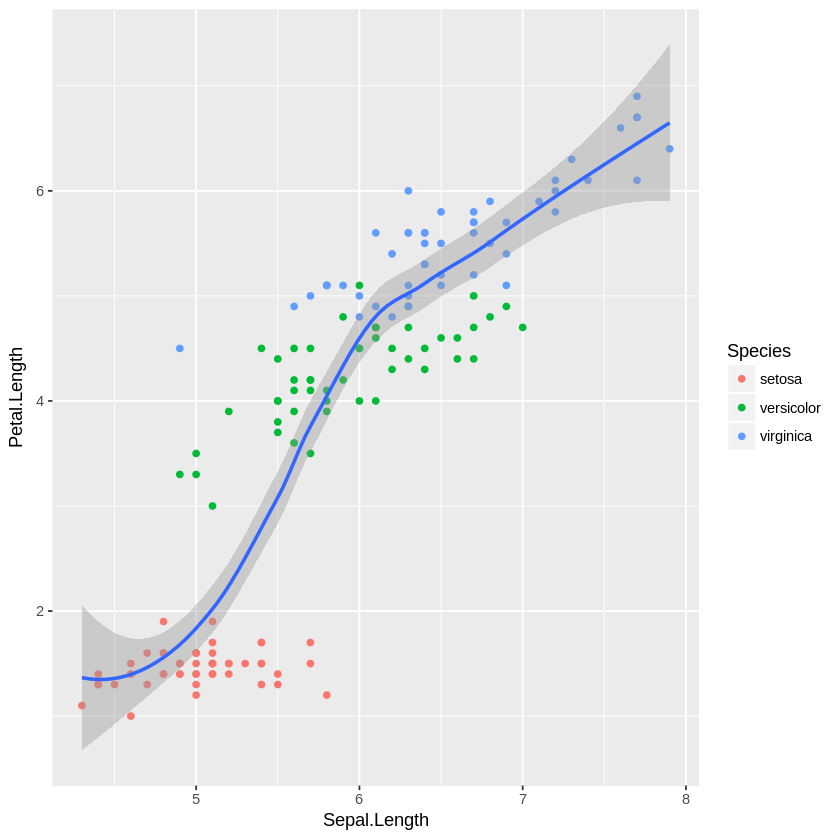

In [22]:
##Si queremos que los puntos tengan la información de especie 
##(coloreados por especie por ejemplo) pero
##queremos mostrar la tendencia global 
##(sin agrupar por especie), entonces sería así:

# Creamos el contenedor de ggplot
ggplot(data=iris) +
geom_point( aes(x=Sepal.Length, y=Petal.Length,color=Species)) + # SOLO los puntos coloreados por especie
stat_smooth(aes(x=Sepal.Length, y=Petal.Length)) # líneas y bandas de suavizado (smooth) sin color

Warning message:
“Using size for a discrete variable is not advised.”`geom_smooth()` using method = 'loess'


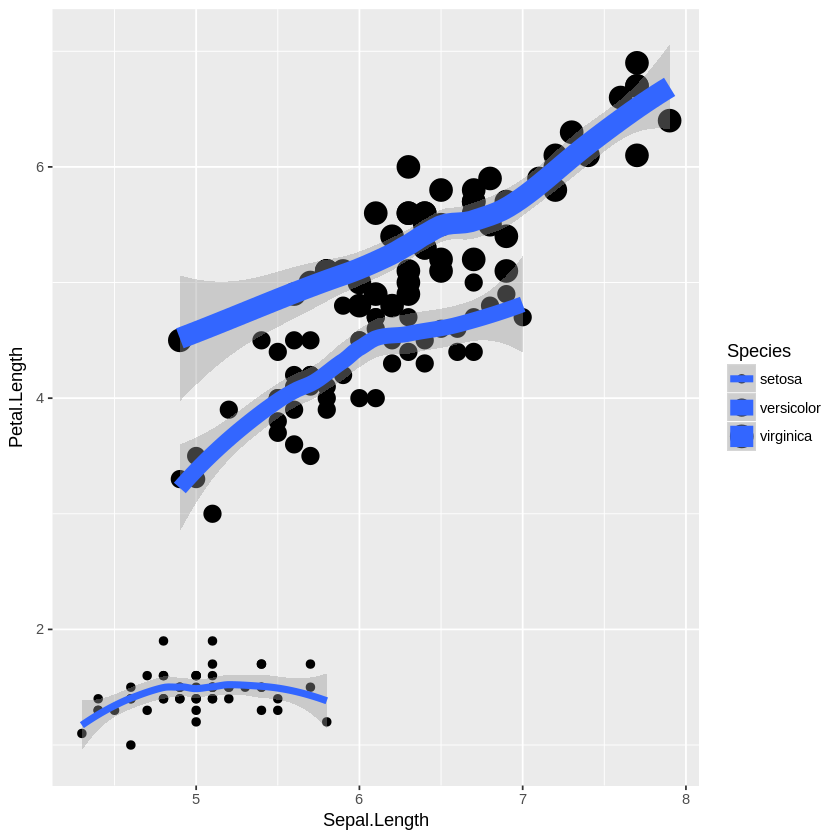

In [23]:
### Agrupar elementos por tamaños 

#No es recomendable usar tamaño para representar variables discretas.
##En general es frecuente usar el tamaño
#para representar variables continuas.
#Para poner un (mal) ejemplo de usar el tamaño para representar 
##variables discretas (en este caso la especie),
#veamos:

# Creamos el contenedor de ggplot
ggplot(data=iris, aes(Sepal.Length, Petal.Length,size=Species)) +
geom_point() + # los puntos
stat_smooth() # líneas y bandas de suavizado (smooth)

`geom_smooth()` using method = 'loess'


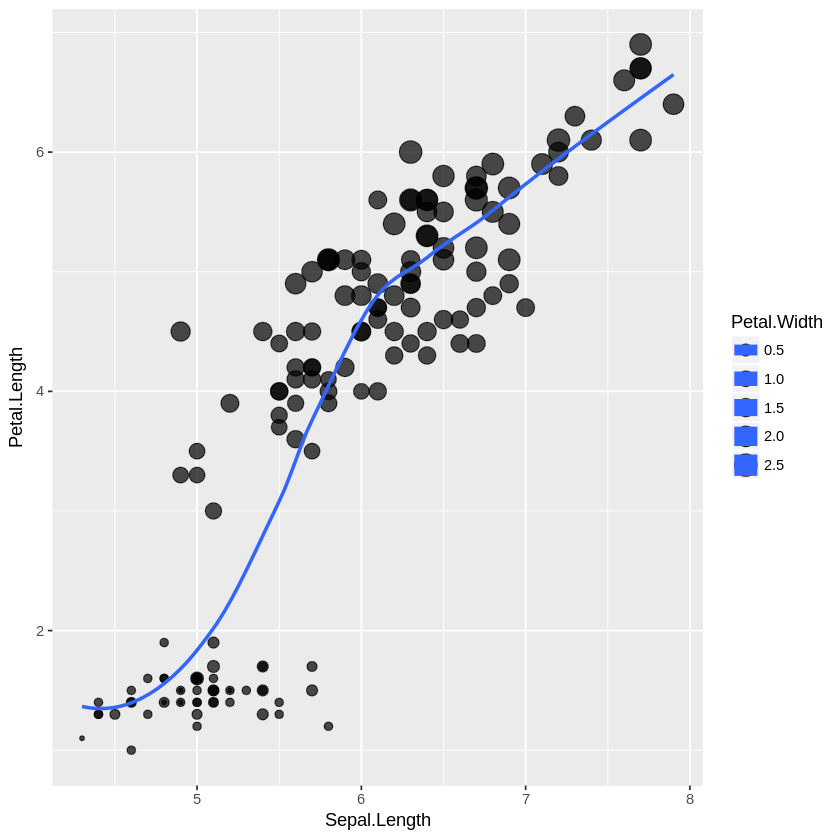

In [86]:
## No queda nada bien ni es nada claro. Por tanto, no es
##recomendable para representar variables discretas,
##pero sí para continuas. Por ejemplo:

# Creamos el contenedor de ggplot (usaremos el Petal.Width para 
#el tamaño)
ggplot(data=iris, aes(Sepal.Length, Petal.Length,size=Petal.Width )) +
geom_point(alpha = I(0.7)) + # los puntos ahora con transparencia (alpha)
stat_smooth(se=F) # líneas y bandas de suavizado (smooth)

`geom_smooth()` using method = 'loess'


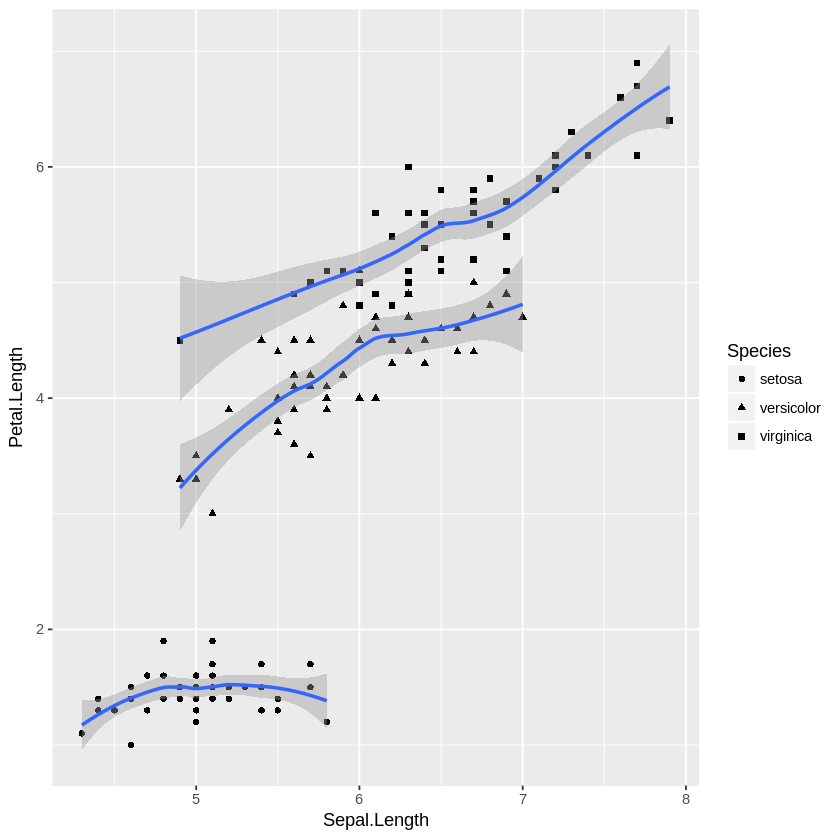

In [25]:
## Agrupar elementos por formas

# Creamos el contenedor de ggplot
ggplot(data=iris, aes(Sepal.Length, Petal.Length,shape=Species)) +
geom_point() + # los puntos
stat_smooth() # líneas y bandas de suavizado (smooth)

`geom_smooth()` using method = 'loess'


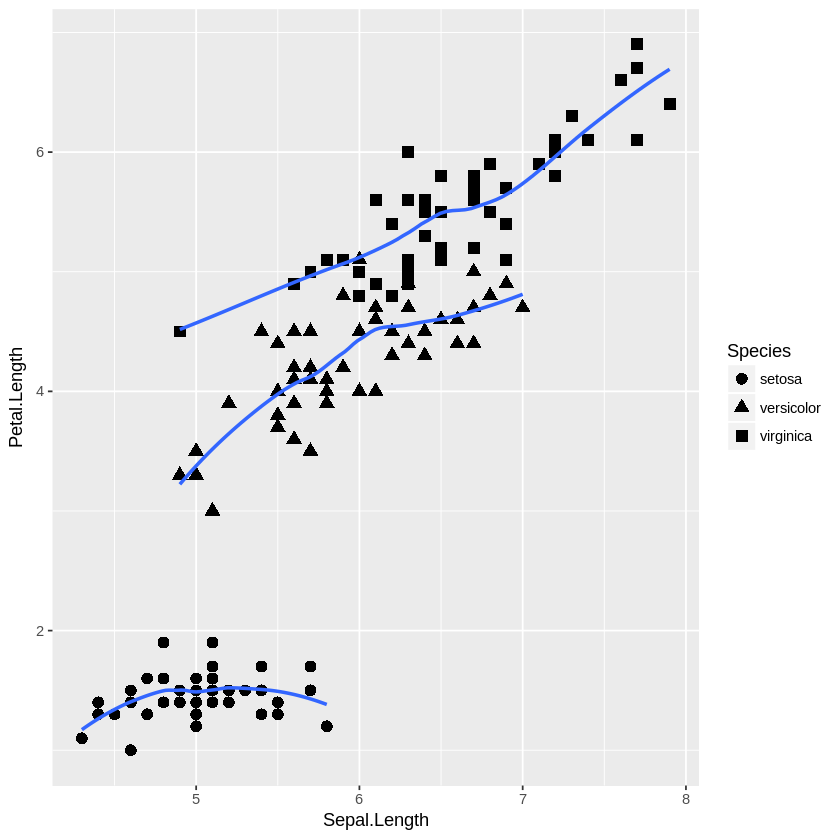

In [26]:
## Si queremos cambiar el tamaño, podemos usar “size=” dentro de 
##“geom_point()” para que sea mas visible.
##Por ejemplo:

# Creamos el contenedor de ggplot
ggplot(data=iris, aes(Sepal.Length, Petal.Length,shape=Species)) +
geom_point(size=3) + # los puntos
stat_smooth(se=F) # líneas y bandas de suavizado (smooth)

## Agrupar elementos

`geom_smooth()` using method = 'loess'


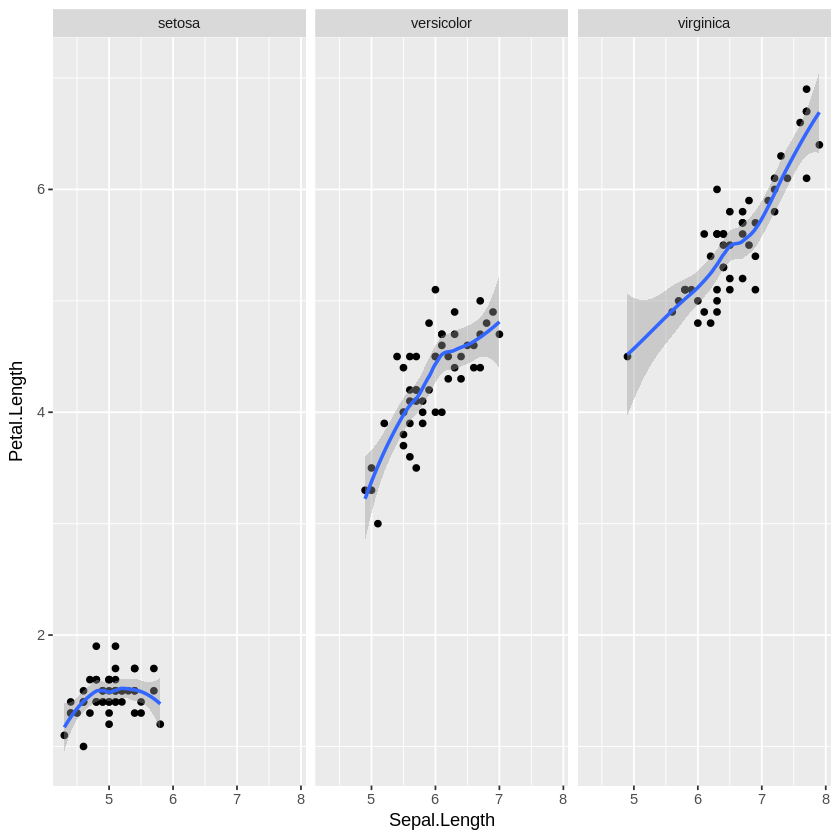

In [48]:
##Facets: como dibujar varios gráficos en un mismo contenedor

##Se puede dibujar cada especie en un gráfico distinto. 
##Cuando hay mucha información en un sólo gráfico
##(muchos puntos, etc.) resulta útil para comparar entre niveles de un factor, separar por ejemplo, entre
##especies.

# Creamos el contenedor de ggplot
ggplot(data=iris, aes(Sepal.Length, Petal.Length)) +
geom_point() + # los puntos
stat_smooth() + # líneas y bandas de suavizado (smooth)
facet_wrap(~ Species) # las especies van en gráficos distintos

`geom_smooth()` using method = 'loess'


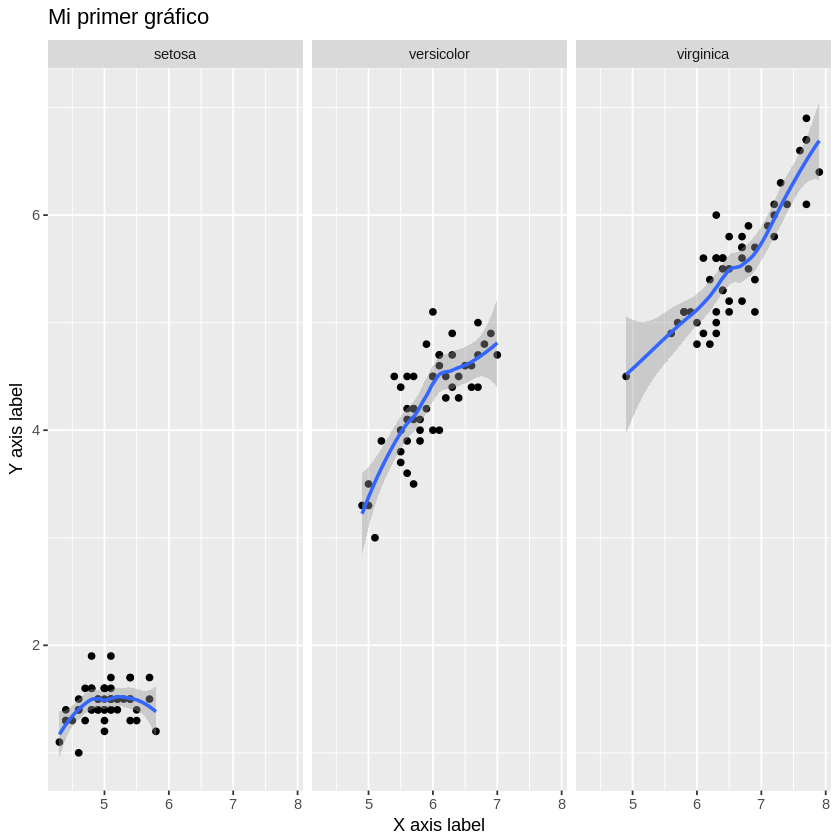

In [80]:
## Para terminar, pongamos algunos detalles a nuestros gráficos
ggplot(data=iris, aes(Sepal.Length, Petal.Length)) +
geom_point() + # los puntos
stat_smooth() + # líneas y bandas de suavizado (smooth)
facet_wrap(~ Species) +# las especies van en gráficos distintos
ggtitle('Mi primer gráfico') +
xlab('X axis label') +
ylab('Y axis label');



In [51]:
## Finalmente, aprendamos como guardar imágenes

jpeg("Mi gráfico.jpeg")
 
edades <- c(20, 33, 40, 12, 50, 26, 18, 79, 47, 23, 8)
plot(edades, main = "Edades", xlab = "Nº de orden", ylab = "Años")
 
dev.off()

png 
  2